In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [69]:
Dataset = pd.read_csv("weather_train.csv")
Dataset.head(12)

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
0,0,2020/02/22,04:11,-1.12724,-0.365968,77.66760,8.210,0.388,-12.412,19.20,1.20,300.10,817.297,0.000,0.0,0.0000,0,50.16,9.460
1,1,2020/07/25,20:10,-1.04030,0.093816,304.73416,20.140,14.855,11.955,59.29,4.45,262.40,820.184,5.334,0.0,0.0000,7,57.39,1.121
2,2,2020/09/13,04:03,-1.29707,-0.251820,68.24852,14.080,6.560,-0.940,35.17,2.45,280.20,822.653,0.000,0.0,0.0000,8,65.63,-0.050
3,3,2020/03/08,15:25,79.20020,-0.014836,237.11811,15.030,5.725,-4.575,24.36,3.70,23.07,809.641,0.000,0.0,0.1587,6,57.08,0.734
4,4,2020/11/17,19:33,-1.61485,-0.459201,271.20406,12.660,3.180,-10.220,17.37,2.70,283.80,818.717,0.000,0.0,0.0000,0,128.59,0.013
5,5,2020/01/03,10:05,382.73100,801.357000,150.30470,4.769,-1.244,-11.644,26.09,3.70,241.70,816.524,0.000,0.0,0.2246,0,85.34,0.272
6,6,2020/10/17,03:47,-1.60765,-0.128379,77.75313,13.720,4.568,-6.532,22.41,3.45,293.40,812.909,0.000,0.0,0.0000,0,157.60,-0.076
7,7,2020/05/20,18:50,36.61840,244.802000,293.79446,21.450,8.121,-6.259,14.09,9.45,272.90,807.832,0.000,0.0,0.1321,0,120.27,0.794
8,8,2020/04/25,15:45,598.04300,932.926000,258.75004,17.220,6.201,-6.599,17.80,5.70,299.90,818.935,0.000,0.0,0.2014,6,76.42,1.315
9,9,2020/12/08,06:17,-1.57862,-0.493768,111.43873,6.855,-1.270,-19.370,11.01,2.95,284.30,823.922,0.000,0.0,0.0000,0,135.88,0.142


In [70]:
Dataset.isnull().sum()

Unnamed: 0                               0
DATE (YYYY/MM/DD)                        0
MST                                      0
Global CMP22 (vent/cor) [W/m^2]          0
Direct sNIP [W/m^2]                      0
Azimuth Angle [degrees]                  0
Tower Dry Bulb Temp [deg C]              0
Tower Wet Bulb Temp [deg C]              0
Tower Dew Point Temp [deg C]             0
Tower RH [%]                             0
Peak Wind Speed @ 6ft [m/s]              0
Avg Wind Direction @ 6ft [deg from N]    0
Station Pressure [mBar]                  0
Precipitation (Accumulated) [mm]         0
Moisture                                 0
Albedo (CMP11)                           0
Cloud Type                               0
Solar Zenith Angle                       0
Snow Depth [cm]                          0
dtype: int64

In [71]:
Dataset.describe()

,Unnamed: 0,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,7499.500000,198.685468,238.327845,180.619177,11.963349,4.688141,-3.085643,40.379494,2.848903,167.942063,816.908084,0.373908,0.063247,0.132990,2.51280,89.540085,-5.843504
std,4330.271354,290.502386,367.967730,100.624137,10.626012,6.901612,7.291346,24.098604,2.089538,116.827730,5.066513,1.897965,0.240467,0.185299,3.00824,40.222812,244.345896
min,0.000000,-4.764200,-8.576660,0.018990,-15.750000,-16.460000,-24.191000,4.850000,0.000000,0.000000,795.152000,0.000000,0.000000,0.000000,0.00000,8.550000,-7999.000000
25%,3749.750000,-1.100810,-0.197508,90.383623,3.494000,-0.751250,-8.578500,22.200000,1.450000,43.437500,813.755500,0.000000,0.000000,0.000000,0.00000,55.890000,0.093000
50%,7499.500000,8.198795,0.296727,181.121640,12.130000,4.830000,-3.611000,33.535000,2.450000,178.500000,817.334500,0.000000,0.000000,0.000000,1.00000,89.855000,0.626000
75%,11249.250000,336.226250,522.699000,270.208625,20.450000,10.727250,2.212000,52.670000,3.700000,282.300000,820.346000,0.000000,0.000000,0.204625,6.00000,123.150000,1.035000
max,14999.000000,1244.640000,1064.160000,359.943840,36.080000,18.917000,16.750000,100.100000,23.450000,359.700000,829.392000,28.190000,1.000000,1.992100,9.00000,171.540000,28.180000


In [72]:
Dataset.shape

(15000, 19)

In [73]:
Dataset = Dataset.drop('Unnamed: 0',axis=1)
Dataset = Dataset.drop('DATE (YYYY/MM/DD)',axis=1)
Dataset = Dataset.drop('MST',axis=1)
Dataset

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
0,-1.12724,-0.365968,77.66760,8.210,0.388,-12.412,19.20,1.20,300.10,817.297,0.000,0.0,0.0000,0,50.16,9.460
1,-1.04030,0.093816,304.73416,20.140,14.855,11.955,59.29,4.45,262.40,820.184,5.334,0.0,0.0000,7,57.39,1.121
2,-1.29707,-0.251820,68.24852,14.080,6.560,-0.940,35.17,2.45,280.20,822.653,0.000,0.0,0.0000,8,65.63,-0.050
3,79.20020,-0.014836,237.11811,15.030,5.725,-4.575,24.36,3.70,23.07,809.641,0.000,0.0,0.1587,6,57.08,0.734
4,-1.61485,-0.459201,271.20406,12.660,3.180,-10.220,17.37,2.70,283.80,818.717,0.000,0.0,0.0000,0,128.59,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.69585,-0.553937,286.76511,13.280,5.410,-3.090,30.95,1.20,35.00,815.183,0.000,0.0,0.0000,0,91.76,0.954
14996,515.44400,912.832000,131.12291,16.980,5.677,-8.323,15.55,8.20,302.50,817.411,0.000,0.0,0.2326,0,44.57,-0.277
14997,286.39400,872.952000,140.97204,3.642,-1.619,-10.419,31.52,0.00,0.00,812.671,0.000,0.0,0.5277,3,82.88,2.426
14998,-1.38846,0.064190,6.62879,23.580,11.528,1.928,24.13,3.45,242.80,813.969,0.000,0.0,0.0000,0,133.73,0.777


In [74]:
Dataset.shape

(15000, 16)

### Visulaisation of Data

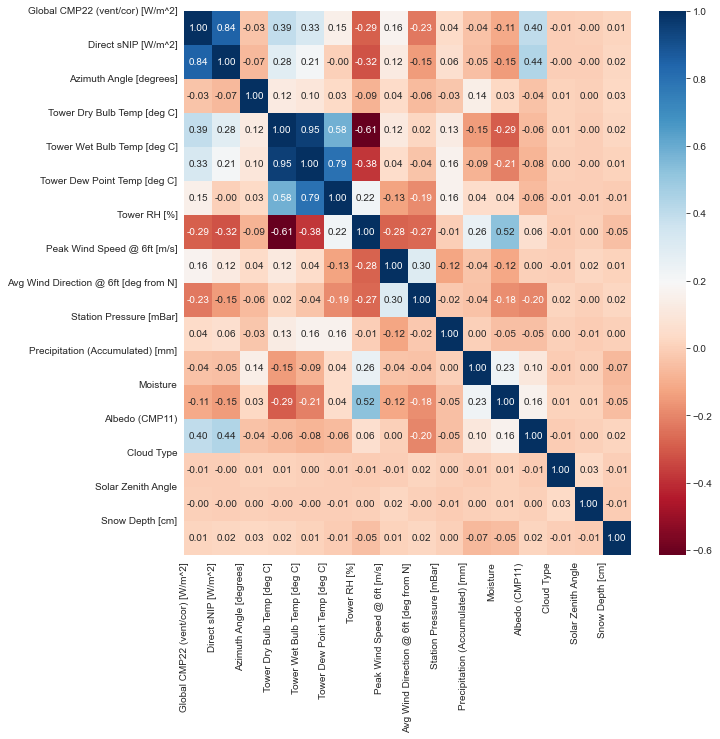

In [75]:
corr = Dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()  #plt.show()

### Linear regression

In [76]:
X1 = Dataset.iloc[:,0:15].values
X1

#X = Dataset.iloc[:, 0:15].values
y = Dataset.iloc[:, 15].values.reshape(-1,1)
X1.shape

(15000, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x13907152cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1390716a430>,
 'boxes': [<matplotlib.lines.Line2D at 0x13907152940>],
 'medians': [<matplotlib.lines.Line2D at 0x1390716ab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1390716aee0>],
 'means': []}

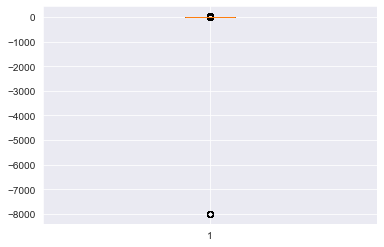

In [77]:
plt.boxplot(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1390710ab80>,
 'caps': [<matplotlib.lines.Line2D at 0x139071162e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1390710a7f0>,
 'medians': [<matplotlib.lines.Line2D at 0x13907116a00>,
 'fliers': [<matplotlib.lines.Line2D at 0x13907116d90>,
 'means': []}

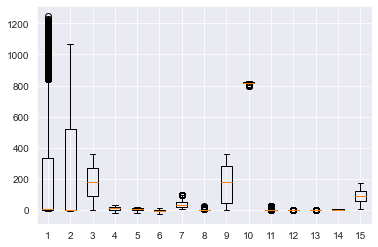

In [78]:
plt.boxplot(X1[:,0:15])

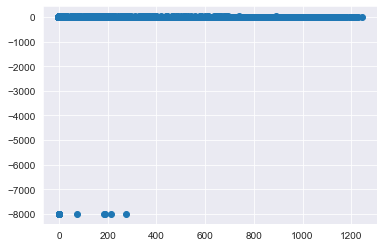

In [79]:
plt.scatter(X1[:,0:1],y)

In [80]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(y)
print("Outliers from IQR method: ", sample_outliers)


0.093 1.035
-1.3199999999999998 2.4479999999999995
Outliers from IQR method:  [array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([-7999.]), array([2.449]), array([2.461]), array([2.469]), array([2.469]), array([2.471]), array([2.477]), array([2.48]), array([2.48]), array([2.482]), array([2.483]), array([2.492]), array([2.493]), array([2.496]), array([2.504]), array([2.507]), array([2.511]), array([2.514]), array([2.517]), array([2.525]), array([2.527]), array([2.529]), array([2.529]), array([2.53]), array([2.533]), array([2.542]), array([2.543]), array([2.547]), array([2.554]), array([2.556]), array([2.56]), array([2.566]), array([2.572]), array([2.582]), array([2.584]), array([2.588]), array([2.599]), array([2.6]), array([2.601]), array([2.615]), array([2.619]), array([2.63]), array([2.632]), array([2.633]), ar

In [81]:
# outliers=[]
# def detect_outlier(data_1):
    
#     threshold=3
#     mean_1 = np.mean(data_1)
#     std_1 =np.std(data_1)
    
    
#     for y in data_1:
#         z_score= (y - mean_1)/std_1 
#         if np.abs(z_score) > threshold:
#             outliers.append(y)
#     return outliers
# sample_outliers =detect_outlier(y)
# print(sample_outliers)

In [82]:
len(sample_outliers)

1915

In [83]:
median = np.median(y)# Replace with median
median

0.626

In [84]:
for j in sample_outliers:
    y = np.where(y==j,median,y)
y

        

array([[ 0.626],
       [ 1.121],
       [-0.05 ],
       ...,
       [ 2.426],
       [ 0.777],
       [ 0.342]])

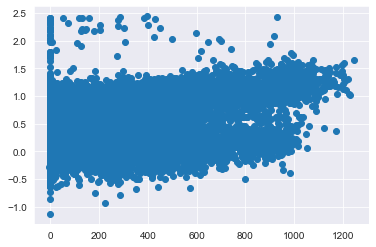

In [85]:
plt.scatter(X1[:,0:1],y)

In [86]:
X1

array([[-1.1272400e+00, -3.6596800e-01,  7.7667600e+01, ...,
         0.0000000e+00,  0.0000000e+00,  5.0160000e+01],
       [-1.0403000e+00,  9.3816000e-02,  3.0473416e+02, ...,
         0.0000000e+00,  7.0000000e+00,  5.7390000e+01],
       [-1.2970700e+00, -2.5182000e-01,  6.8248520e+01, ...,
         0.0000000e+00,  8.0000000e+00,  6.5630000e+01],
       ...,
       [ 2.8639400e+02,  8.7295200e+02,  1.4097204e+02, ...,
         5.2770000e-01,  3.0000000e+00,  8.2880000e+01],
       [-1.3884600e+00,  6.4190000e-02,  6.6287900e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.3373000e+02],
       [ 4.3538100e+02,  7.6554000e+02,  2.5474761e+02, ...,
         2.1810000e-01,  1.0000000e+00,  5.4060000e+01]])

In [87]:
#Importing the model from sklearn 
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()  #Making the instance of the model

#fit your model by passing desired parameters. 
regressor_linear.fit(X1, y)  #X, y

LinearRegression()

In [88]:
predicted_snow_depth=regressor_linear.predict(X1)
predicted_snow_depth

array([[0.20525653],
       [0.68112547],
       [0.2431859 ],
       ...,
       [0.44114357],
       [0.23353664],
       [0.14268   ]])

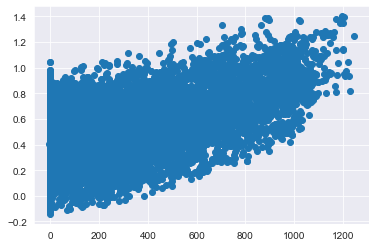

In [89]:
plt.scatter(X1[:,0:1],predicted_snow_depth)

In [90]:
test2 = pd.read_csv('weather_test.csv')
test2.head()
test2.shape


(2406, 18)

In [91]:
test_X1 = test2.iloc[:, 3:18].values
test_X1
test_X1.shape

(2406, 15)

In [92]:
predicted_snow_depth_test=regressor_linear.predict(test_X1)
predicted_snow_depth_test

array([[0.46177912],
       [0.4999761 ],
       [0.30970571],
       ...,
       [0.35455197],
       [0.71408853],
       [0.90748279]])

In [93]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_linear, X = X1, y = y, cv = 10)  #regressor_poly2  #Pass the estimator

# Predicting R2 Score the Train set results
y_pred = regressor_linear.predict(X1)
r2_score_train = r2_score(y, y_pred)

# Predicting R2 Score the Test set results
#y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
#r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results

#calculate the Root mean Square Error
rmse_poly2 = (np.sqrt(mean_squared_error(y, y_pred)))  #(np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_train)
#print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.24716619337709958
R2_score (train):  0.2493133083368173
RMSE:  0.40996735316637184


In [94]:
# convert array into dataframe
DF = pd.DataFrame(predicted_snow_depth_test)
  
# save the dataframe as a csv file
DF.to_csv("data_test_5.csv")

### Supoort Vector Regression

In [95]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X1)
y_scaled = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X1)).reshape(-1,1))
r2_score_svr_train = r2_score(y, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(test_X1)).reshape(-1,1))
#r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
# rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
#print('R2_score (test): ', r2_score_svr_test)
#print("RMSE: ", rmse_svr)

In [ ]:
# convert array into dataframe
DF1 = pd.DataFrame(y_pred_svr_test)
  
# save the dataframe as a csv file
DF1.to_csv("data_test_4.csv")

In [ ]:
plt.scatter(X1[:,0:1],y_pred_svr_train )